In [ ]:
#Deleting any previous kaggle.json file
!rm -rf ~/.kaggle


In [ ]:
#Uploading the real kaggle.json file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#Moving it to the correct location with proper permissions
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Verifying your credentials
!kaggle datasets list -s santander


ref                                                                title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rymnikski/dataset-for-collaborative-filters                        Dataset for collaborative filters                     9500633  2016-12-22 21:20:13.100000           2382         37  0.8235294        
alvarolopez/tusbic                                                 Tusbic Santander                                      2832011  2018-03-21 17:52:51.343000            373         15  0.8235294        
lakshmi25npathi/santander-customer-transaction-prediction-dataset  Santander Customer Transaction Prediction Dataset   261798898  2019-05-24 06:17:57.770000           3901         51  0.588235

In [ ]:
# Downloading data directly in Colab
!kaggle competitions download -c santander-product-recommendation
!unzip santander-product-recommendation.zip

 63% 143M/228M [00:00<00:00, 1.49GB/s]
100% 228M/228M [00:00<00:00, 777MB/s] 
Archive:  santander-product-recommendation.zip
  inflating: sample_submission.csv.zip  
  inflating: test_ver2.csv.zip       
  inflating: train_ver2.csv.zip      


In [ ]:
#Unzipping the inner CSV files
!unzip -o train_ver2.csv.zip
!unzip -o test_ver2.csv.zip
!unzip -o sample_submission.csv.zip


Archive:  train_ver2.csv.zip
  inflating: train_ver2.csv          
Archive:  test_ver2.csv.zip
  inflating: test_ver2.csv           
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [ ]:
#Verifying that the files exist
!ls -lh


total 2.8G
-rw-r--r-- 1 root root   70 Dec  1 22:51 kaggle.json
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data
-rw-r--r-- 1 root root  23M May 31  2018 sample_submission.csv
-rw-r--r-- 1 root root 2.3M Dec 11  2019 sample_submission.csv.zip
-rw-r--r-- 1 root root 229M Dec 11  2019 santander-product-recommendation.zip
-rw-r--r-- 1 root root 106M Oct 27  2016 test_ver2.csv
-rw-r--r-- 1 root root  13M Dec 11  2019 test_ver2.csv.zip
-rwxrwxrwx 1 root root 2.2G Oct 27  2016 train_ver2.csv
-rw-r--r-- 1 root root 215M Dec 11  2019 train_ver2.csv.zip


In [ ]:
#Creating SQLite database and importing data
import pandas as pd
import sqlite3

# Connect to (or create) SQLite database
conn = sqlite3.connect("santander.db")

# IMPORTANT: Drop the existing table if it exists (to start fresh)
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS santander_train")
conn.commit()
print("✓ Dropped existing santander_train table (if it existed)\n")

# Load CSV in chunks to prevent memory overflow
chunksize = 50000  # Adjust based on Colab memory
csv_path = "train_ver2.csv"

# Your renaming dictionary (assuming this is defined elsewhere or will be defined before this cell runs)
column_rename_dict = {
    'fecha_dato': 'transaction_date',
    'ncodpers': 'customer_id',
    'ind_empleado': 'employment_status',
    'pais_residencia': 'residence_country',
    'sexo': 'gender',
    'age': 'age',
    'fecha_alta': 'first_join_date',
    'ind_nuevo': 'is_new_customer',
    'antiguedad': 'tenure_months',
    'indrel': 'primary_customer',
    'ult_fec_cli_1t': 'last_primary_date',
    'indrel_1mes': 'customer_type_start',
    'tiprel_1mes': 'relation_type_start',
    'indresi': 'residence_index',
    'indext': 'is_foreigner',
    'conyuemp': 'spouse_employee',
    'canal_entrada': 'channel_entrance',
    'indfall': 'is_deceased',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'activity_status',
    'renta': 'household_gross_income',
    'segmento': 'segment',
    'ind_ahor_fin_ult1': 'saving_account',
    'ind_aval_fin_ult1': 'guarantees',
    'ind_cco_fin_ult1': 'current_account',
    'ind_cder_fin_ult1': 'derivatives',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposits',
    'ind_deme_fin_ult1': 'medium_term_deposits',
    'ind_dela_fin_ult1': 'long_term_deposits',
    'ind_ecue_fin_ult1': 'e_account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'taxes',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'payroll',
    'ind_nom_pens_ult1': 'pension_2',
    'ind_recibo_ult1': 'direct_debit'
}


for chunk in pd.read_csv(csv_path, chunksize=chunksize):
    # Rename columns in the chunk
    chunk.rename(columns=column_rename_dict, inplace=True) # Added inplace=True for direct modification
    chunk.to_sql("santander_train", conn, if_exists="append", index=False)
    print(f"Inserted {len(chunk)} rows...")

conn.close()
print("Data successfully loaded into SQLite database.")

✓ Dropped existing santander_train table (if it existed)



/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,12,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,12,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 47309 rows...
Data successfully loaded into SQLite database.


In [ ]:
import numpy as np
import pandas as pd
import sqlite3

# ========================================
# STEP 1: LOAD DATA
# ========================================
conn = sqlite3.connect("santander.db")

# Load main table
query = "SELECT * FROM santander_train ORDER BY customer_id,first_join_date LIMIT 3500000 ;"
df = pd.read_sql(query, conn)

print("="*60)
print("STEP 1: DATA LOADED")
print("="*60)
print(f"Original shape: {df.shape}")
print(f"Original columns ({len(df.columns)}): {df.columns.tolist()}")

display(df.head(100))


STEP 1: DATA LOADED
Original shape: (3500000, 48)
Original columns (48): ['transaction_date', 'customer_id', 'employment_status', 'residence_country', 'gender', 'age', 'first_join_date', 'is_new_customer', 'tenure_months', 'primary_customer', 'last_primary_date', 'customer_type_start', 'relation_type_start', 'residence_index', 'is_foreigner', 'spouse_employee', 'channel_entrance', 'is_deceased', 'address_type', 'province_code', 'province_name', 'activity_status', 'household_gross_income', 'segment', 'saving_account', 'guarantees', 'current_account', 'derivatives', 'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account', 'short_term_deposits', 'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pension_2', 'direct_debit']


,transaction_date,customer_id,employment_status,residence_country,gender,age,first_join_date,is_new_customer,tenure_months,primary_customer,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pension_2,direct_debit
0,2015-01-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0.0,0.0,0
1,2015-02-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
2,2015-03-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
3,2015-04-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
4,2015-05-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-09-28,15895,A,ES,H,49,1995-01-16,0.0,248,1.0,...,0,1,0,1,1,1,0,0.0,0.0,1
96,2015-10-28,15895,A,ES,H,49,1995-01-16,0.0,249,1.0,...,0,1,0,1,1,1,0,0.0,0.0,1
97,2015-11-28,15895,A,ES,H,49,1995-01-16,0.0,250,1.0,...,0,1,0,1,1,1,0,0.0,0.0,1
98,2015-12-28,15895,A,ES,H,49,1995-01-16,0.0,251,1.0,...,0,1,0,1,1,1,0,0.0,0.0,1


In [ ]:
# ========================================
# STEP 2: LOAD FILTER CONFIGURATION
# ========================================

print("Upload your investigate.xlsx file:")

from google.colab import files
uploaded = files.upload()

filtered_df = pd.read_excel('investigate.xlsx', sheet_name='filtered')
print("\n" + "="*60)
print("STEP 2: FILTER CONFIGURATION LOADED")
print("="*60)
print(filtered_df[['Column Name', 'Medata Field', 'Keep']].head(25))

Upload your investigate.xlsx file:


Saving investigate.xlsx to investigate.xlsx

STEP 2: FILTER CONFIGURATION LOADED
              Column Name            Medata Field  Keep
0                ncodpers             customer_id   1.0
1         pais_residencia       residence_country   1.0
2                    sexo                  gender   1.0
3                     age                     age   1.0
4              fecha_alta         first_join_date   1.0
5                 indresi         residence_index   1.0
6           canal_entrada        channel_entrance   1.0
7   ind_actividad_cliente         activity_status   1.0
8                   renta  household_gross_income   1.0
9       ind_ahor_fin_ult1          saving_account   1.0
10      ind_aval_fin_ult1              guarantees   1.0
11      ind_ctju_fin_ult1          junior_account   1.0
12      ind_pres_fin_ult1                   loans   1.0
13      ind_tjcr_fin_ult1             credit_card   1.0
14      ind_nom_pens_ult1                pensions   1.0
15        ind_recibo_ul

In [ ]:
# ========================================
# STEP 3: SELECT COLUMNS TO KEEP
# ========================================
# Get metadata field names for columns to keep
keep_columns = filtered_df[filtered_df['Keep'] == 1.0]['Medata Field'].dropna().tolist()

# Filter df to only include these columns
train_df = df[keep_columns].copy()

print("\n" + "="*60)
print("STEP 3: COLUMNS SELECTED")
print("="*60)
print(f"Columns to keep ({len(keep_columns)}): {keep_columns}")
print(f"Shape after selection: {train_df.shape}")


STEP 3: COLUMNS SELECTED
Columns to keep (18): ['customer_id', 'residence_country', 'gender', 'age', 'first_join_date', 'residence_index', 'channel_entrance', 'activity_status', 'household_gross_income', 'saving_account', 'guarantees', 'junior_account', 'loans', 'credit_card', 'pensions', 'direct_debit', 'mortgage', 'employment_status']
Shape after selection: (3500000, 18)


To increase performance and decrease noise, unnecessary information fields were eliminated using an Excel-based "keep/drop" mapping. This resulted in a separate product snapshot dataset and a cleansed customer dataset with about 3500000 records.


In [ ]:
# ========================================
# STEP 4: REMOVE DUPLICATES (BEFORE TRANSFORMATION)
# ========================================
initial_rows = len(train_df)
train_df.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)
print("\n" + "="*60)
print("STEP 4: DUPLICATES REMOVED")
print("="*60)
print(f"Rows removed: {initial_rows - len(train_df)}")
print(f"Remaining rows: {len(train_df)}")


STEP 4: DUPLICATES REMOVED
Rows removed: 3274957
Remaining rows: 225043


In [ ]:
print("\n" + "="*60)
print("FIXING Emloyment Status DATA")
print("="*60)

import numpy as np
import pandas as pd

COL = "employment_status"
DROP_CODES = {"A", "F"}     # remove these rows
FILL_CODE  = "N"            # fill missing with 'N'
ALLOWED    = {"B","N","P","S"}  # expected post-clean (you can adjust)

def clean_encode_employment_status(df: pd.DataFrame, col: str = COL):
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in dataframe.")

    out = df.copy()

    # Snapshot BEFORE (raw)
    print("=== BEFORE (raw, including NaN) ===")
    print(out[col].value_counts(dropna=False).to_string())
    print()

    # Normalize ONLY string values safely
    s = out[col]

    # Convert to pandas StringDtype (keeps missing as <NA>, not 'nan')
    s = s.astype("string")

    # Strip + uppercase ONLY for non-missing strings
    s = s.str.strip().str.upper()

    # Standardize common missing tokens to NA
    s = s.replace(
        {
            "": pd.NA,
            "NA": pd.NA,
            "N/A": pd.NA,
            "NONE": pd.NA,
            "NULL": pd.NA
        }
    )

    # Drop rows with A or F
    drop_mask = s.isin(DROP_CODES)
    dropped = int(drop_mask.sum())
    out = out.loc[~drop_mask].copy()

    # Align s to the filtered frame
    s = s.loc[~drop_mask]

    # Fill remaining missing with 'N'
    s = s.fillna(FILL_CODE)


    # Write back cleaned column
    out[col] = s.astype("string")

    # Encode (NOT binary): category -> int labels in stable alphabetical order
    out[col] = out[col].astype("category")
    cats_sorted = sorted(out[col].cat.categories.tolist())
    out[col] = out[col].cat.set_categories(cats_sorted, ordered=True)
    mapping = {cat: idx for idx, cat in enumerate(out[col].cat.categories)}
    out[f"{col}_int"] = out[col].map(mapping).astype("int8")

    # Diagnostics
    print(f"✓ Dropped rows where {col} in {sorted(DROP_CODES)}: {dropped}")
    print(f"✓ Filled missing with '{FILL_CODE}'")
    print("\nMapping (category → integer):")
    for k, v in mapping.items():
        print(f"  {k!r} → {v}")

    print("\n=== AFTER (categories) ===")
    print(out[col].value_counts().to_string())

    print("\n=== AFTER (encoded int counts) ===")
    print(out[f"{col}_int"].value_counts().sort_index().to_string())

    print("\nSample:")
    print(out[['customer_id', col, f"{col}_int"]].head(10).to_string(index=False))

    return out, mapping

# Run
train_df, emp_map = clean_encode_employment_status(train_df, COL)



FIXING Emloyment Status DATA
=== BEFORE (raw, including NaN) ===
employment_status
N       222722
None      1825
B          218
F          150
A          128

✓ Dropped rows where employment_status in ['A', 'F']: 278
✓ Filled missing with 'N'

Mapping (category → integer):
  'B' → 0
  'N' → 1

=== AFTER (categories) ===
employment_status
N    224547
B       218

=== AFTER (encoded int counts) ===
employment_status_int
0       218
1    224547

Sample:
 customer_id employment_status  employment_status_int
       15891                 N                      1
       15893                 N                      1
       15898                 N                      1
       15899                 B                      0
       15900                 B                      0
       15902                 B                      0
       15906                 N                      1
       15910                 B                      0
       15915                 N                      1
    

In [ ]:
import pandas as pd
import numpy as np

# --- Clean and normalize gender values ---
train_df['gender'] = (
    train_df['gender']
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({'': np.nan, 'NA': np.nan, 'N/A': np.nan, 'NONE': np.nan, 'NULL': np.nan})
)

# --- Keep only customers with valid H or V ---
valid_genders = ['H', 'V']
train_df = train_df[train_df['gender'].isin(valid_genders)].copy()

# --- Optionally check duplicates and take most frequent per customer ---
gender_map = (
    train_df.groupby('customer_id')['gender']
    .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)

# --- Replace gender column with stable per-customer value ---
train_df['gender'] = train_df['customer_id'].map(gender_map)

# --- Encode: H → 0, V → 1 ---
train_df['gender'] = train_df['gender'].map({'H': 0, 'V': 1}).astype('int64')

# --- Display results ---
print("✓ Gender column cleaned & encoded (unknowns removed, H=0, V=1)")
print("Final gender distribution:")
print(train_df['gender'].value_counts())

# --- Preview a few rows ---
display(train_df[['customer_id', 'gender']].head(10))



✓ Gender column cleaned & encoded (unknowns removed, H=0, V=1)
Final gender distribution:
gender
1    143428
0     79508
Name: count, dtype: int64


,customer_id,gender
34,15891,0
53,15893,1
133,15898,0
144,15899,1
161,15900,1
195,15902,0
229,15906,0
280,15910,1
342,15915,1
353,15916,0


In [ ]:
train_df.head(100)

,customer_id,residence_country,gender,age,first_join_date,residence_index,channel_entrance,activity_status,household_gross_income,saving_account,guarantees,junior_account,loans,credit_card,pensions,direct_debit,mortgage,employment_status,employment_status_int
34,15891,ES,0,59,2015-07-28,S,KAT,1.0,NaN,0,0,0,0,0,0,0,0,N,1
53,15893,ES,1,62,1997-10-03,S,KAT,1.0,430477.41,0,0,0,0,0,0,0,0,N,1
133,15898,ES,0,60,2000-01-26,S,KAT,0.0,175450.05,0,0,0,0,0,0,0,0,N,1
144,15899,ES,1,57,1995-01-16,S,KAT,1.0,130835.64,0,0,0,0,0,1,1,0,B,0
161,15900,ES,1,48,1995-01-16,S,KAT,1.0,105327.03,0,0,0,0,0,0,1,0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,16067,ES,1,62,1995-02-21,S,KAT,1.0,403872.78,0,0,0,0,1,0,0,0,N,1
2346,16070,ES,0,83,1995-02-21,S,KAT,1.0,478928.46,0,0,0,0,0,0,0,0,N,1
2363,16073,ES,1,49,1995-02-21,S,KAT,0.0,53478.18,0,0,0,0,0,0,0,0,N,1
2375,16074,ES,1,47,2009-06-25,S,KFA,0.0,53478.18,0,0,0,0,0,0,0,0,N,1


In [ ]:

# 5.2 Transform Age
train_df['age'] = train_df['age'].astype(str).str.strip()
train_df['age'] = pd.to_numeric(train_df['age'], errors='coerce')

# Calculate median from valid ages
valid_ages = train_df['age'].dropna()
median_age = valid_ages.median() if len(valid_ages) > 0 else 35

train_df['age'] = train_df['age'].fillna(median_age)
train_df['age'] = train_df['age'].replace([np.inf, -np.inf], median_age)
train_df['age'] = train_df['age'].astype('int')

# Filter age range
before_filter = len(train_df)
train_df = train_df[(train_df['age'] > 18) & (train_df['age'] < 60)]
print(f"✓ Age transformed and filtered (18-60)")
print(f"  Rows removed by age filter: {before_filter - len(train_df)}")
print(f"  Remaining rows: {len(train_df)}")

# 5.3 Transform first_join_date
train_df['first_join_date'] = pd.to_datetime(train_df['first_join_date'])
train_df['first_join_date'] = train_df['first_join_date'] + pd.DateOffset(years=5)

print("✓ first_join_date transformed to datetime")

# 5.4 Transform residence_index
train_df['residence_index'] = train_df['residence_index'].apply(
    lambda x: 'Y' if x == 'S' else 'N'
)
print("✓ residence_index transformed (S→Y)")

# 5.5 Transform channel_entrance
train_df['channel_entrance'] = train_df['channel_entrance'].fillna('KDB')
print("✓ channel_entrance - missing values filled with 'KDB'")

# 5.6 Transform activity_status
train_df['activity_status'] = train_df['activity_status'].fillna(0).astype('int64')
print("✓ activity_status transformed to int")

# 5.7 Transform pension (if exists)
if 'pensions' in train_df.columns:
    nan_count = train_df['pensions'].isna().sum()
    if nan_count > 0:
        train_df.loc[train_df['pensions'].isna(), 'pensions'] = np.random.randint(0, 2, size=nan_count)
    train_df['pensions'] = train_df['pensions'].astype('int')
    print("✓ pensions transformed to int")






✓ Age transformed and filtered (18-60)
  Rows removed by age filter: 63648
  Remaining rows: 159288
✓ first_join_date transformed to datetime
✓ residence_index transformed (S→Y)
✓ channel_entrance - missing values filled with 'KDB'
✓ activity_status transformed to int
✓ pensions transformed to int


In [ ]:
# ========================================
# STEP 6: HANDLE HOUSEHOLD INCOME
# ========================================
print("\n" + "="*60)
print("STEP 6: HANDLING INCOME DATA")
print("="*60)

# Calculate statistics from valid incomes
valid_incomes = train_df['household_gross_income'].replace([np.inf, -np.inf], np.nan).dropna()

if len(valid_incomes) > 0:
    median_income = valid_incomes.median()
    mean_income = valid_incomes.mean()
    print(f"✓ Median Household Income: ${median_income:,.2f}")
    print(f"✓ Mean Household Income: ${mean_income:,.2f}")
else:
    median_income = 89,000
    print(f"⚠ No valid income data - using default: ${median_income:,.2f}")

# Fill missing values
train_df['household_gross_income'] = train_df['household_gross_income'].replace([np.inf, -np.inf], np.nan)
train_df['household_gross_income'] = train_df['household_gross_income'].fillna(median_income)
print("✓ Missing household income values filled")



STEP 6: HANDLING INCOME DATA
✓ Median Household Income: $121,425.66
✓ Mean Household Income: $156,063.05
✓ Missing household income values filled


In [ ]:
# ========================================
# STEP 7: GENERATE NEW FEATURES (no random children; loans include mortgage)
# ========================================
print("\n" + "="*60)
print("STEP 7: GENERATING NEW FEATURES")
print("="*60)

# 7.1 Personal Income (keep your logic)
proportions = np.random.uniform(0.5, 1.0, size=len(train_df))
train_df['personal_income'] = (train_df['household_gross_income'] * proportions).round(2)
print("✓ personal_income generated (50–100% of household income)")
print(f"  Mean: ${train_df['personal_income'].mean():,.2f}")






STEP 7: GENERATING NEW FEATURES
✓ personal_income generated (50–100% of household income)
  Mean: $112,908.79


In [ ]:
print("Checking for duplicate columns...")
print(f"Original columns: {train_df.columns.tolist()}")

# Remove duplicate columns (keep first occurrence)
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

print(f"After removing duplicates: {train_df.columns.tolist()}")
print(f"Shape: {train_df.shape}\n")

Checking for duplicate columns...
Original columns: ['customer_id', 'residence_country', 'gender', 'age', 'first_join_date', 'residence_index', 'channel_entrance', 'activity_status', 'household_gross_income', 'saving_account', 'guarantees', 'junior_account', 'loans', 'credit_card', 'pensions', 'direct_debit', 'mortgage', 'employment_status', 'employment_status_int', 'personal_income']
After removing duplicates: ['customer_id', 'residence_country', 'gender', 'age', 'first_join_date', 'residence_index', 'channel_entrance', 'activity_status', 'household_gross_income', 'saving_account', 'guarantees', 'junior_account', 'loans', 'credit_card', 'pensions', 'direct_debit', 'mortgage', 'employment_status', 'employment_status_int', 'personal_income']
Shape: (159288, 20)



In [ ]:
# 7.3 Current Loan Amount (INCLUDES MORTGAGE)
# Create a skewed multiplier to simulate amount scale relative to income
loan_to_income_ratio = np.random.lognormal(mean=1.16, sigma=0.7, size=len(train_df))
base_amount = train_df['personal_income'].fillna(0) * loan_to_income_ratio

# Build loan_flag = 1 if loans==1 OR mortgage==1 (if mortgage exists), else just loans
loans_flag = train_df['loans'].fillna(0).astype(int) > 0
if 'mortgage' in train_df.columns:
    mortgage_flag = train_df['mortgage'].fillna(0).astype(int) > 0
    loan_flag = (loans_flag | mortgage_flag).astype(int)
    used_mortgage = True
else:
    loan_flag = loans_flag.astype(int)
    used_mortgage = False

train_df['current_loan_amount'] = (loan_flag * base_amount).fillna(0).round(2)

print("✓ current_loan_amount generated (loans OR mortgage)" if used_mortgage
      else "✓ current_loan_amount generated (mortgage column not found; used loans only)")
pos_cnt = (train_df['current_loan_amount'] > 0).sum()
avg_amt = train_df.loc[train_df['current_loan_amount'] > 0, 'current_loan_amount'].mean()
print(f"  Customers with positive loan amount: {pos_cnt:,}")
print(f"  Average loan amount: ${0 if pd.isna(avg_amt) else avg_amt:,.2f}")



✓ current_loan_amount generated (loans OR mortgage)
  Customers with positive loan amount: 3,989
  Average loan amount: $461,174.36


In [ ]:
# ========================================
# STEP 8: FINAL VALIDATION
# ========================================
print("\n" + "="*60)
print("STEP 8: FINAL DATA VALIDATION")
print("="*60)
print(f"Final shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")

print("\nMissing values:")
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing[missing > 0])

print("\nData types:")
print(train_df.dtypes)

print("\n" + "="*60)
print("DATA PROCESSING COMPLETE!")
print("="*60)
print("\nFirst 5 rows:")
print(train_df.head())


STEP 8: FINAL DATA VALIDATION
Final shape: (159288, 21)
Columns: ['customer_id', 'residence_country', 'gender', 'age', 'first_join_date', 'residence_index', 'channel_entrance', 'activity_status', 'household_gross_income', 'saving_account', 'guarantees', 'junior_account', 'loans', 'credit_card', 'pensions', 'direct_debit', 'mortgage', 'employment_status', 'employment_status_int', 'personal_income', 'current_loan_amount']

Missing values:
✓ No missing values!

Data types:
customer_id                        int64
residence_country                 object
gender                             int64
age                                int64
first_join_date           datetime64[ns]
residence_index                   object
channel_entrance                  object
activity_status                    int64
household_gross_income           float64
saving_account                     int64
guarantees                         int64
junior_account                     int64
loans                           

In [ ]:
from datetime import datetime
import numpy as np


In [ ]:
def generate_credit_score(row):
    # Deterministic base score
    base_score = 650

    # Income factor (0-150 points)
    temp = np.clip(row['household_gross_income'] / 10000, 0, 10)
    base_score += temp * 15

    # Account history
    if row['activity_status'] == 1:
        account_age = (datetime.now() - row['first_join_date']).days / 365
        base_score += min(account_age * 10, 80)
    else:
        base_score -= 70

    # Product ownership
    if row['saving_account'] == 1:
        base_score += 30
    if row['direct_debit'] == 1:
        base_score += 25
    if row['pensions'] == 1:
        base_score += 40

    # Loan burden (FIXED - deterministic penalty)
    if row['loans'] == 1 and row['current_loan_amount'] > 0:
        loan_penalty = min((row['current_loan_amount'] / 1000) * 5, 120)
        base_score -= loan_penalty

    # LTI ratio (FIXED - added validation)
    loan_amount = float(row['current_loan_amount'])
    personal_income = float(row['personal_income'])

    if personal_income > 0 and loan_amount > 0:
        lti_ratio = loan_amount / personal_income
        if lti_ratio > 0.5:
            base_score -= min(int(lti_ratio * 200), 150)

    # FICO-like range (300-850)
    return max(300, min(int(base_score), 850))


In [ ]:
train_df['credit_score'] = np.zeros(len(train_df))
train_df['credit_score'] = train_df.apply(lambda row: generate_credit_score(row), axis=1)
train_df.head(5)

,customer_id,residence_country,gender,age,first_join_date,residence_index,channel_entrance,activity_status,household_gross_income,saving_account,...,loans,credit_card,pensions,direct_debit,mortgage,employment_status,employment_status_int,personal_income,current_loan_amount,credit_score
34,15891,ES,0,59,2020-07-28,Y,KAT,1,121425.66,0,...,0,0,0,0,0,N,1,116031.54,0.00,850
144,15899,ES,1,57,2000-01-16,Y,KAT,1,130835.64,0,...,0,0,1,1,0,B,0,88154.70,0.00,850
161,15900,ES,1,48,2000-01-16,Y,KAT,1,105327.03,0,...,0,0,0,1,0,B,0,72472.53,0.00,850
195,15902,ES,0,57,2000-01-16,Y,KAT,1,230408.25,0,...,0,0,0,0,0,B,0,118014.08,0.00,850
229,15906,ES,0,55,2006-02-16,Y,KAT,1,81005.49,0,...,0,0,0,1,1,N,1,64264.66,197599.45,726


In [ ]:
train_df['first_join_date'].dt.year

,first_join_date
34,2020
144,2000
161,2000
195,2000
229,2006
...,...
3499853,2009
3499870,2009
3499887,2009
3499932,2009


In [ ]:
def generate_segment(row):
    # Handle missing dates first
    if pd.isna(row['first_join_date']):
        return "Unknown"  # or use a default like "Missing Data"

    years_since_join = 2020 - row['first_join_date'].year

    if years_since_join <= 1:
        segment = "0-1 year"
    elif years_since_join <= 4:  # Fixed: was "1 < years_since_join <= 4"
        segment = "2-4 years"
    elif years_since_join >= 5:
        segment = "5+ years"
    else:
        segment = "Unknown"
    return segment

# Now apply it
train_df['customer_segment_model'] = train_df.apply(lambda row: generate_segment(row), axis=1)


In [ ]:
train_df['customer_segment_model']

,customer_segment_model
34,0-1 year
144,5+ years
161,5+ years
195,5+ years
229,5+ years
...,...
3499853,5+ years
3499870,5+ years
3499887,5+ years
3499932,5+ years


In [ ]:
# See when customers actually joined
print("Join year distribution:")
print(train_df['first_join_date'].dt.year.value_counts().sort_index())

# Check segment distribution
print("\nSegment distribution:")
print(train_df['customer_segment_model'].value_counts())

# Sample some records
print("\nSample customers:")
print(train_df[['first_join_date', 'customer_segment_model']].head(20))


Join year distribution:
first_join_date
2000     3128
2001     5709
2002     8671
2003    13186
2004    14306
2005    19574
2006    33363
2007    29851
2008    20039
2009     6181
2010     1014
2011      803
2012      562
2013      440
2014      282
2015      501
2016      333
2017      288
2018      256
2019      347
2020      309
2021      145
Name: count, dtype: int64

Segment distribution:
customer_segment_model
5+ years     157610
2-4 years       877
0-1 year        801
Name: count, dtype: int64

Sample customers:
    first_join_date customer_segment_model
34       2020-07-28               0-1 year
144      2000-01-16               5+ years
161      2000-01-16               5+ years
195      2000-01-16               5+ years
229      2006-02-16               5+ years
280      2000-01-16               5+ years
342      2000-07-21               5+ years
353      2000-01-16               5+ years
387      2000-01-16               5+ years
404      2000-01-16               5+ years
47

In [ ]:
# 2. Show percentage breakdown
print("\nPercentage Distribution:")
print(train_df['customer_segment_model'].value_counts(normalize=True) * 100)


# 4. Calculate years since 2020 for all customers
train_df['years_calc'] = 2020 - train_df['first_join_date'].dt.year
print("\nYears Since Join (calculated):")
print(train_df['years_calc'].value_counts().sort_index())

# 5. Find any non "5+ years" customers
other_segments = train_df[train_df['customer_segment_model'] != '5+ years']
print(f"\nCustomers NOT in '5+ years': {len(other_segments)}")
if len(other_segments) > 0:
    print(other_segments[['first_join_date', 'customer_segment_model', 'years_calc']].head(20))



Percentage Distribution:
customer_segment_model
5+ years     98.946562
2-4 years     0.550575
0-1 year      0.502863
Name: proportion, dtype: float64

Years Since Join (calculated):
years_calc
-1       145
 0       309
 1       347
 2       256
 3       288
 4       333
 5       501
 6       282
 7       440
 8       562
 9       803
 10     1014
 11     6181
 12    20039
 13    29851
 14    33363
 15    19574
 16    14306
 17    13186
 18     8671
 19     5709
 20     3128
Name: count, dtype: int64

Customers NOT in '5+ years': 1678
      first_join_date customer_segment_model  years_calc
34         2020-07-28               0-1 year           0
5287       2020-09-30               0-1 year           0
13511      2019-09-16               0-1 year           1
14736      2018-12-18              2-4 years           2
16548      2020-01-04               0-1 year           0
20836      2016-06-12              2-4 years           4
24076      2019-01-20               0-1 year           1
314

In [ ]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Set visual theme
sns.set(style="whitegrid", palette="muted")

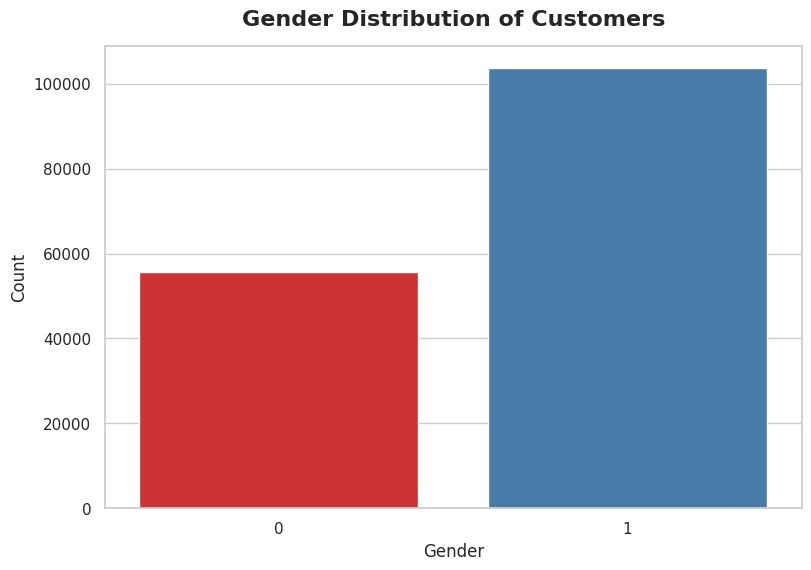

In [ ]:
# Gender Distribution
plt.figure(figsize=(9,6))
sns.countplot(x='gender', data=train_df, hue='gender', palette='Set1', legend=False)
plt.title("Gender Distribution of Customers",fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### **Gender Distribution of Customers**

This bar chart displays the gender composition of customers after cleaning and encoding the gender column (H → 0 for male and V → 1 for female).

After processing the dataset, it was clearly indicating a female-dominant customer base. This suggests that a higher proportion of women engage with or subscribe to the bank’s financial products compared to men.

Understanding this gender imbalance is important for personalizing marketing strategies and designing product offerings that better align with customer demographics.

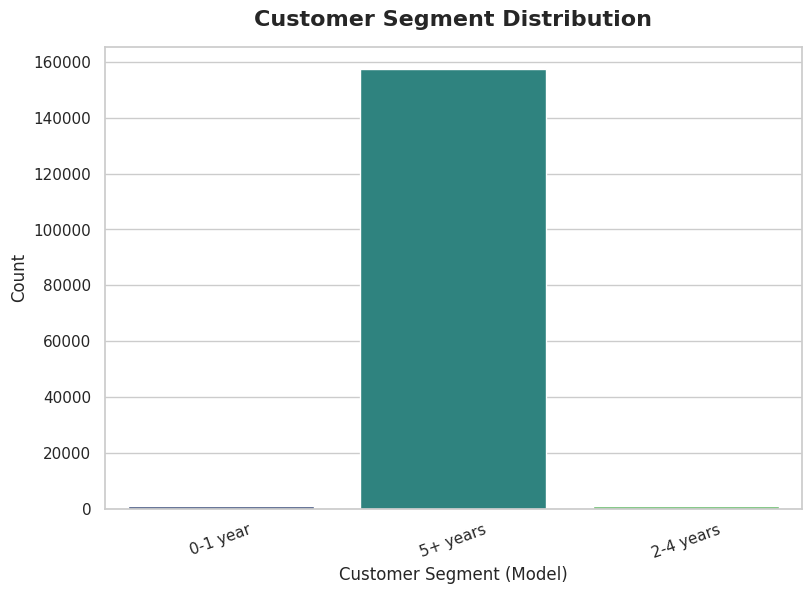

In [ ]:
# Customer Segment Distribution
plt.figure(figsize=(9,6))
sns.countplot(
    x='customer_segment_model',
    data=train_df,
    hue='customer_segment_model',
    palette='viridis',
    legend=False
)
plt.title("Customer Segment Distribution", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Customer Segment (Model)")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

### **Customer Segment Distribution**

This chart categorizes customers based on their tenure, calculated from the first_join_date field:

5+ years: 157610 customers (≈99%)

2–4 years: 877 customers

0–1 year: 801 customers

The data reveals that the bank has a highly loyal and mature customer base, with the majority of clients maintaining relationships for over five years. However, the very small share of new customers highlights a gap in customer acquisition.

This pattern suggests the bank’s retention strategies are strong, but there is an opportunity to invest more in attracting new clients through targeted onboarding programs and marketing campaigns while continuing to nurture long-term loyalty among existing customers..

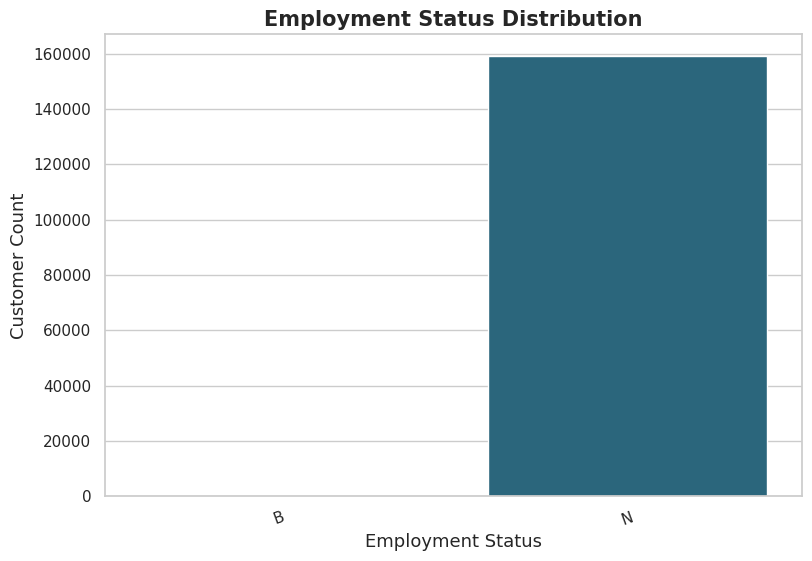

In [ ]:
# Employment Status Distribution
plt.figure(figsize=(9,6))
sns.countplot(
    data=train_df,
    x='employment_status',
    palette='crest',
    hue='employment_status',
    legend=False
)
plt.title("Employment Status Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Employment Status", fontsize=13)
plt.ylabel("Customer Count", fontsize=13)
plt.xticks(rotation=20)
plt.show()


### **Employment Status Distribution**

This chart shows the distribution of customers after cleaning invalid entries (A, F) and filling missing values with N.

N (Not employed in the bank): ≈99% customers

B (Ex-bank employees): ≈1%

The results indicate that the dataset primarily consists of external retail customers rather than internal bank employees. This is valuable because it suggests the behavioral patterns observed in the data are representative of general banking customers, reducing the likelihood of internal bias and ensuring more reliable insights for customer segmentation and product recommendation.

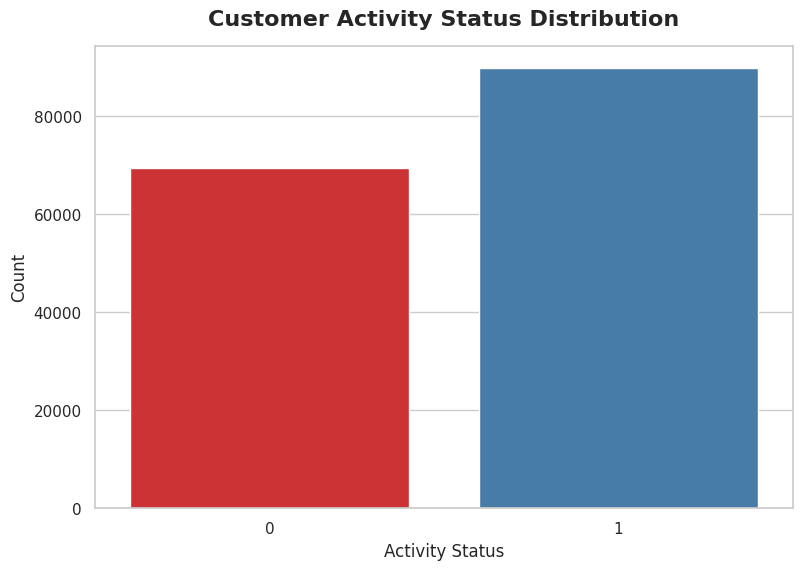

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(
    x='activity_status',
    data=train_df,
    hue='activity_status',
    palette='Set1',
    legend=False
)
plt.title("Customer Activity Status Distribution", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Activity Status")
plt.ylabel("Count")
plt.show()

### **Customer Activity Status Distribution**

This chart illustrates the activity status of customers, indicating whether they actively use bank products (1) or not (0).

Active Customers: ~90000

Inactive Customers: ~69000

About 57% of customers are currently active, while 43% are inactive, showing that nearly half of the customer base is disengaged. This insight highlights the importance of churn prevention and reactivation strategies, such as targeted campaigns to re-engage low-activity users through incentives or personalized offers.

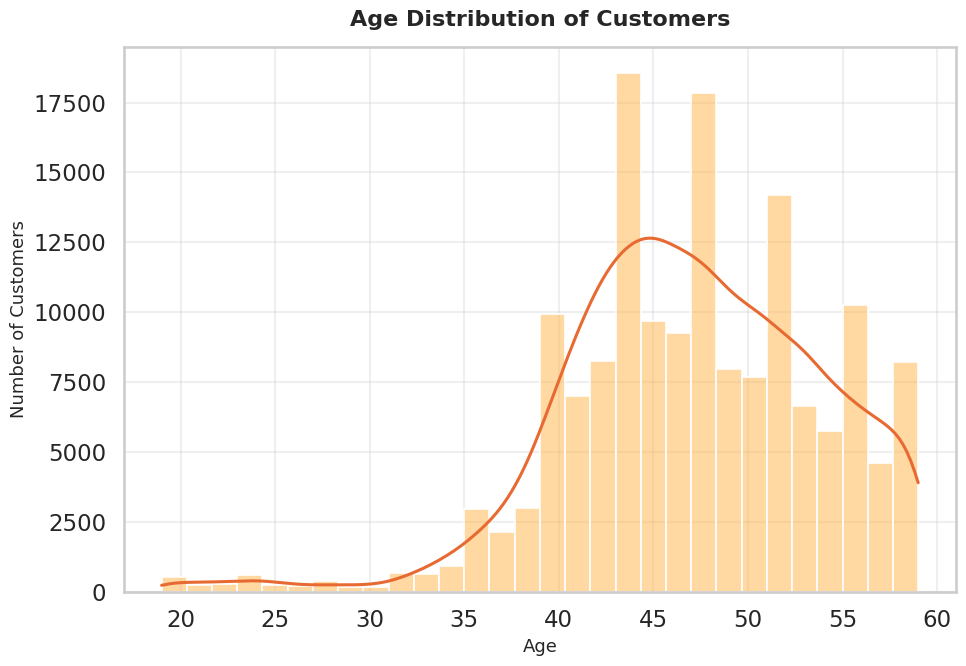

In [ ]:
# Age Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Clean, professional theme
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,7))

# Improved histogram with smoothed KDE (correct syntax for Seaborn ≥0.13)
sns.histplot(
    data=train_df,
    x='age',
    bins=30,
    color='#FFB347',          # soft amber-orange bars
    edgecolor='white',
    linewidth=1.2,
    kde=True,
    kde_kws={'bw_adjust': 1.5}  # smooths the trend line
)

# Style the KDE line manually using matplotlib after plotting
ax = plt.gca()
for line in ax.lines:  # find KDE line in the Axes
    line.set_color('#E86A33')
    line.set_linewidth(2.2)

# Titles and labels
plt.title("Age Distribution of Customers", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Customers", fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### **Age Distribution of Customers**

This histogram displays the age distribution after cleaning and filtering data to include customers aged 18–60 years.

The peak age group is between 45–55 years, with a median age around 50. The customer base is primarily middle-aged, an age segment often associated with stable income and higher financial product adoption. This demographic insight suggests a focus on retirement planning, investment, and loan products for optimal engagement.

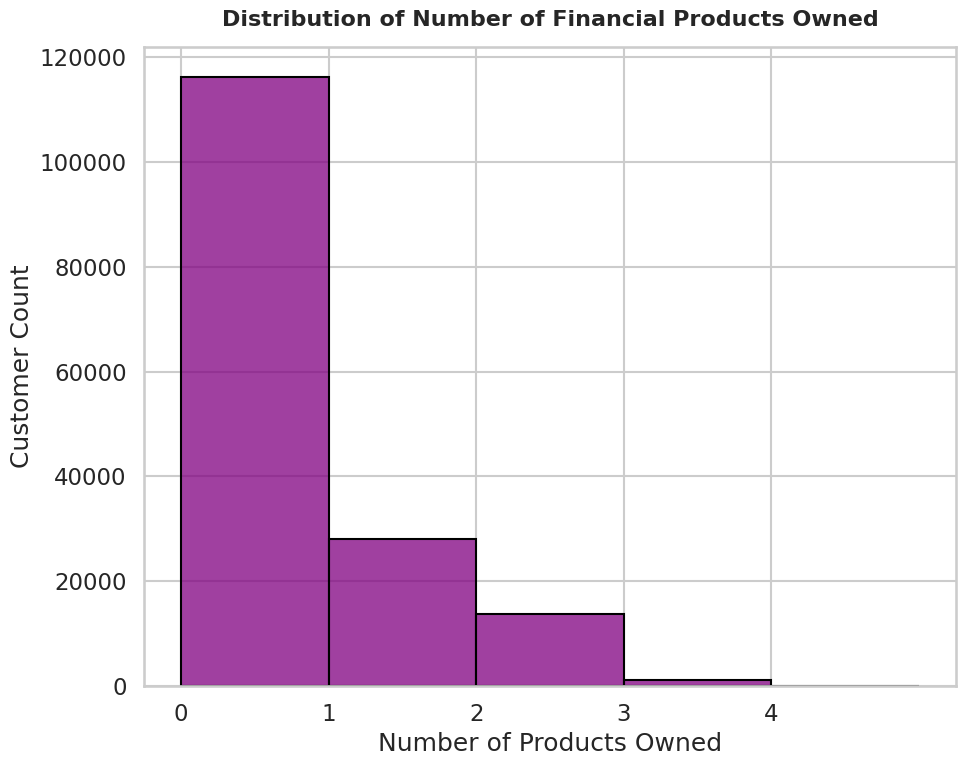

In [ ]:
# Distribution of Number of Financial Products Owned

import matplotlib.pyplot as plt
import seaborn as sns

# Select product columns
product_cols = [
    'saving_account', 'guarantees', 'junior_account', 'loans',
    'credit_card', 'pensions', 'direct_debit'
]

# Calculate number of products each customer owns
train_df['total_products_owned'] = train_df[product_cols].sum(axis=1)

# Plot a pure histogram
plt.figure(figsize=(10,8))
sns.histplot(train_df['total_products_owned'], bins=range(0, train_df['total_products_owned'].max() + 2),
             color='purple', kde=False, edgecolor='black')
plt.title("Distribution of Number of Financial Products Owned", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Number of Products Owned")
plt.ylabel("Customer Count")
plt.xticks(range(train_df['total_products_owned'].max() + 1))
plt.tight_layout()
plt.show()


### **Distribution of Number of Financial Products Owned**

This bar chart shows how many financial products (e.g., savings, credit cards, loans, pensions) each customer holds.

Most customers own only one product, and ownership declines sharply as the number of products increases, showing a right-skewed distribution. This pattern reveals cross-selling potential—customers with one product can be encouraged to adopt additional ones such as credit cards, insurance, or loans to enhance customer value and retention.

In [ ]:
# Correlation between Account Holdings

import seaborn as sns
import matplotlib.pyplot as plt

# Select only product columns
product_cols = [
    'saving_account','junior_account' , 'loans', 'credit_card',
    'pensions', 'direct_debit','mortgage'
]

# Compute correlation matrix
corr = train_df[product_cols].corr()

display(corr)

,saving_account,junior_account,loans,credit_card,pensions,direct_debit,mortgage
saving_account,1.000000,-0.000972,-0.001093,-0.002391,0.007439,0.006743,0.001102
junior_account,-0.000972,1.000000,-0.002563,-0.017029,-0.008291,-0.025736,-0.007210
loans,-0.001093,-0.002563,1.000000,0.020107,0.006664,0.018755,0.010146
credit_card,-0.002391,-0.017029,0.020107,1.000000,0.102111,0.444783,0.134923
pensions,0.007439,-0.008291,0.006664,0.102111,1.000000,0.120388,0.038792
direct_debit,0.006743,-0.025736,0.018755,0.444783,0.120388,1.000000,0.234973
mortgage,0.001102,-0.007210,0.010146,0.134923,0.038792,0.234973,1.000000


Since there is no correlation between junior account so we decided to drop it from the product *list*

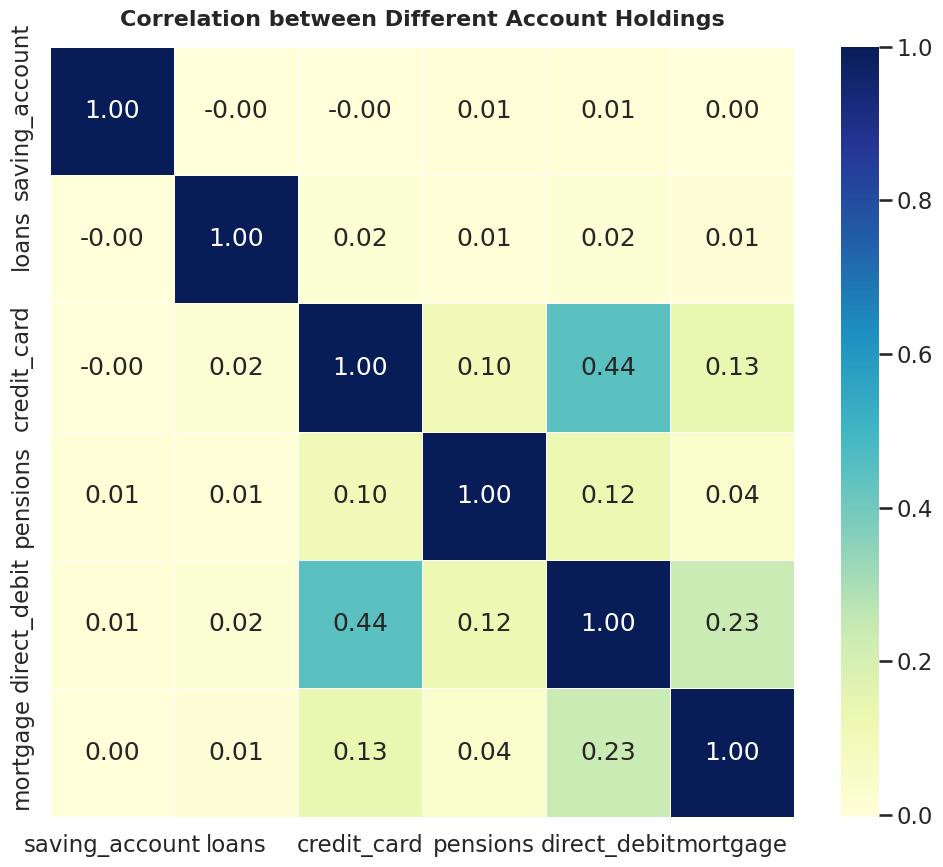

In [ ]:
# Correlation between Account Holdings

import seaborn as sns
import matplotlib.pyplot as plt

# Select only product columns
product_cols = [
    'saving_account', 'loans', 'credit_card',
    'pensions', 'direct_debit','mortgage'
]

# Compute correlation matrix
corr = train_df[product_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation between Different Account Holdings", fontsize=16, fontweight='bold', pad=15)
plt.show()


### **Correlation Between Different Account Holdings**

This heatmap visualizes correlations between major financial products such as savings, loans, credit cards, pensions, direct debits, and mortgages.

Most product relationships are weak, but the strongest correlation (~0.48) is between credit cards and direct debits, indicating that customers who use one are somewhat likely to use the other. This insight supports product bundling strategies, for example, pairing credit cards with automated payment or savings plans to boost adoption and convenience.

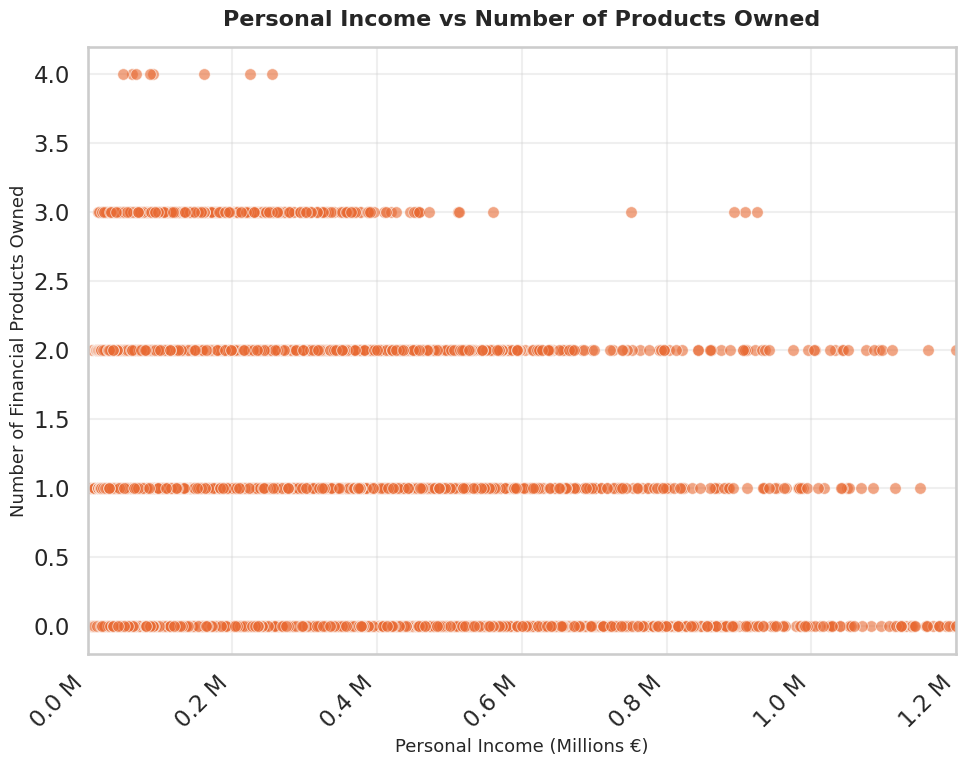

In [ ]:
# Personal Income vs Number of Products Owned
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,8))

# Scatter plot
sns.scatterplot(
    data=train_df,
    x='personal_income',
    y='total_products_owned',
    alpha=0.6,
    color='#E86A33',
    s=70
)

# Format x-axis for millions with clean spacing
plt.xlim(0, 1_200_000)
plt.xticks(
    np.arange(0, 1_200_001, 200_000),   # ticks every 0.2M
    [f"{x/1e6:.1f} M" for x in np.arange(0, 1_200_001, 200_000)]
)
plt.xticks(rotation=45, ha='right')

# Titles & labels
plt.title("Personal Income vs Number of Products Owned", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Personal Income (Millions €)", fontsize=13)
plt.ylabel("Number of Financial Products Owned", fontsize=13)

# Grid & layout
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### **Personal Income vs. Number of Financial Products Owned**

This scatter plot illustrates the relationship between customers’ personal income (in millions of euros) and the number of financial products they own. Each point represents an individual customer.

Overall, a mild upward trend can be observed — customers with higher personal incomes tend to own slightly more banking products such as credit cards, loans, and savings accounts. However, the trend is not strongly linear, indicating that income alone does not fully determine product ownership.

Interestingly, some low-income customers own multiple financial products, including up to four. This could be due to factors such as long-term loyalty, household-level finances, or reliance on credit-based products like loans and mortgages. These cases show that income does not always reflect financial engagement — some customers may maintain multiple accounts or products for family needs or small-business use, despite modest income levels.

This finding highlights the need to consider multiple behavioral and demographic features (such as tenure, age, and activity level) when modeling product adoption. Rather than relying solely on income, a multivariate approach can help identify valuable customers more accurately and support personalized banking recommendations.

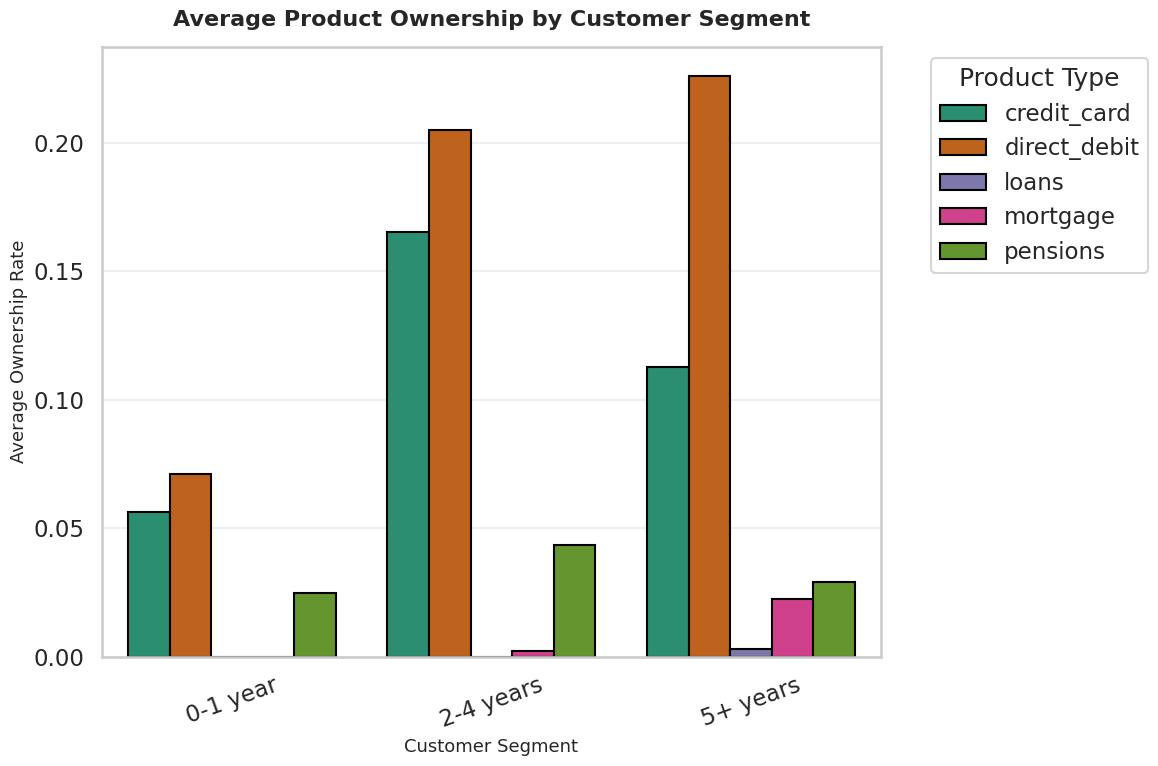

In [ ]:
#Product Ownership by Customer Segment
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Choose top 5 products
top_products = [
    'direct_debit',
    'credit_card',
    'loans',
    'pensions',
    'mortgage'
]

# Step 2: Melt dataset to long format (segment × product)
melted = train_df.melt(
    id_vars=['customer_segment_model'],
    value_vars=top_products,
    var_name='Product',
    value_name='Ownership'
)

# Step 3: Compute average ownership per segment per product
segment_product_avg = (
    melted.groupby(['customer_segment_model', 'Product'])['Ownership']
    .mean()
    .reset_index()
)

# Step 4: Improved color palette — distinct, readable colors
custom_palette = sns.color_palette(["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e"])

plt.figure(figsize=(12, 8))
sns.barplot(
    data=segment_product_avg,
    x='customer_segment_model',
    y='Ownership',
    hue='Product',
    palette=custom_palette,
    edgecolor='black'
)

# Titles and labels
plt.title("Average Product Ownership by Customer Segment", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Customer Segment", fontsize=13)
plt.ylabel("Average Ownership Rate", fontsize=13)
plt.xticks(rotation=20)
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### **Average Product Ownership by Customer Segment**
This grouped bar chart illustrates the average product ownership rate across three customer tenure segments—0–1 year, 2–4 years, and 5+ years—covering key financial products such as credit cards, direct debits, loans, mortgages, and pensions.

The results show that direct debit and credit card ownership dominate across all tenure categories, particularly among customers who have been with the bank for more than five years. Mid-term customers (2–4 years) exhibit growing adoption of products like credit cards and pensions, reflecting an expansion phase in their financial engagement. In contrast, new customers (0–1 year) own fewer products, indicating limited financial involvement during the early stages of their relationship.

Overall, the chart highlights a strong positive correlation between customer tenure and product diversification. Long-term customers appear more confident in adopting multiple banking products, suggesting greater trust and satisfaction with the institution. This pattern reinforces the strategic importance of customer retention and loyalty programs. By focusing on sustained engagement, the bank can enhance cross-selling opportunities and increase overall customer lifetime value (LTV). Additionally, tailored marketing campaigns can be developed to encourage newer customers to explore complementary financial products, accelerating their journey toward higher-value relationships.

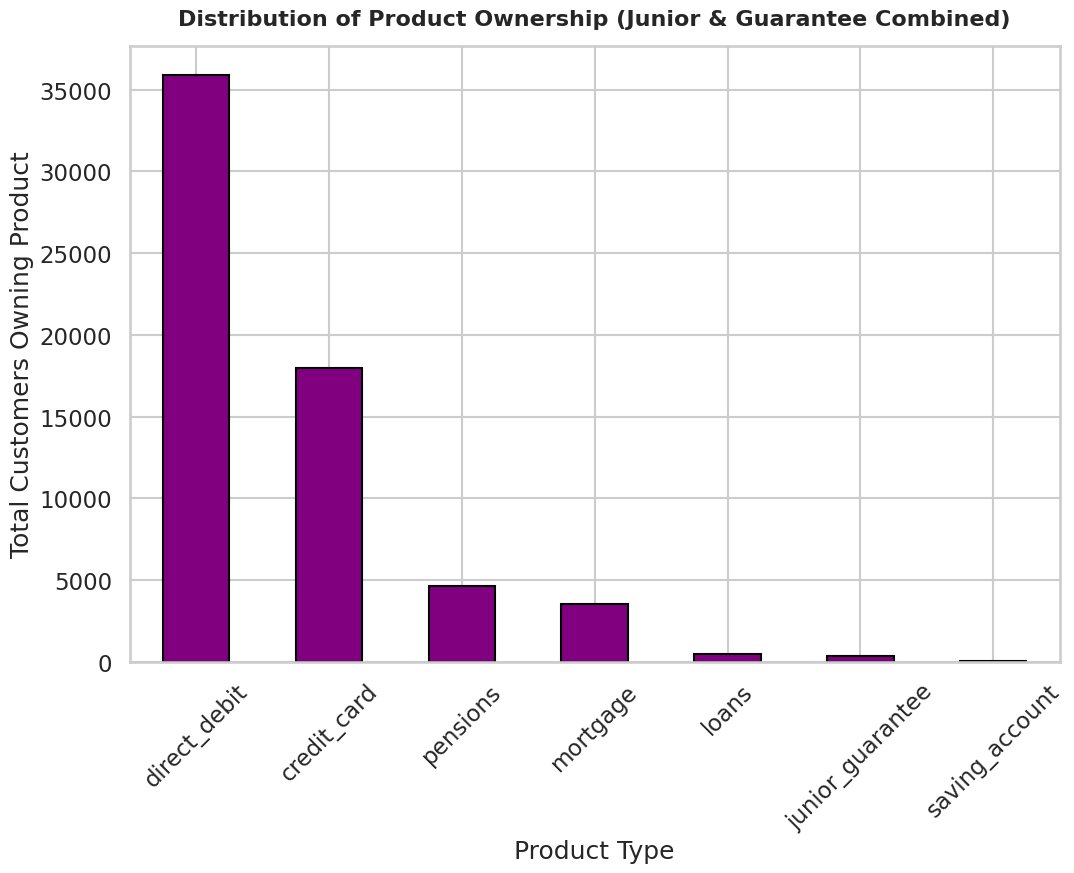

In [ ]:
# Distribution of Products (with 'junior' & 'guarantee' Combined)

# Combine 'junior_account' and 'guarantees' into a single column
train_df['junior_guarantee'] = train_df['junior_account'] + train_df['guarantees']

# Select all relevant product columns
product_cols = [
    'saving_account', 'junior_guarantee', 'loans', 'credit_card',
    'pensions', 'direct_debit','mortgage'
]

# Sum ownership across all customers for each product
product_sums = train_df[product_cols].sum().sort_values(ascending=False)

# Plot distribution
plt.figure(figsize=(12,8))
product_sums.plot(kind='bar', color='Purple', edgecolor='black')
plt.title("Distribution of Product Ownership (Junior & Guarantee Combined)", fontsize=16, fontweight='bold', pad=15)
plt.ylabel("Total Customers Owning Product")
plt.xlabel("Product Type")
plt.xticks(rotation=45)
plt.show()


### **Distribution of Product Ownership (Junior & Guarantee Combined)**

This bar chart displays the total number of customers holding each product type.

Direct debits and credit cards dominate the portfolio, while loans and junior accounts show the lowest ownership rates. This suggests that the bank’s strongest product lines are in payments and savings, while credit and youth-oriented products remain underutilized. The insight presents an opportunity to diversify customer engagement by promoting lesser-used financial products through tailored offers.

In [ ]:
train_df.head(500)

,customer_id,residence_country,gender,age,first_join_date,residence_index,channel_entrance,activity_status,household_gross_income,saving_account,...,mortgage,employment_status,employment_status_int,personal_income,current_loan_amount,credit_score,customer_segment_model,years_calc,total_products_owned,junior_guarantee
34,15891,ES,0,59,2020-07-28,Y,KAT,1,121425.66,0,...,0,N,1,116031.54,0.00,850,0-1 year,0,0,0
144,15899,ES,1,57,2000-01-16,Y,KAT,1,130835.64,0,...,0,B,0,88154.70,0.00,850,5+ years,20,2,0
161,15900,ES,1,48,2000-01-16,Y,KAT,1,105327.03,0,...,0,B,0,72472.53,0.00,850,5+ years,20,1,0
195,15902,ES,0,57,2000-01-16,Y,KAT,1,230408.25,0,...,0,B,0,118014.08,0.00,850,5+ years,20,0,0
229,15906,ES,0,55,2006-02-16,Y,KAT,1,81005.49,0,...,1,N,1,64264.66,197599.45,726,5+ years,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14498,17561,ES,1,41,2000-12-26,Y,KAT,1,64527.36,0,...,0,N,1,54942.24,0.00,850,5+ years,20,1,0
14532,17567,ES,1,57,2000-10-25,Y,KAT,1,145556.31,0,...,0,N,1,102848.06,0.00,850,5+ years,20,0,0
14566,17571,ES,1,46,2003-12-05,Y,KAT,1,336803.04,0,...,0,N,1,329640.05,0.00,850,5+ years,17,1,0
14583,17574,ES,1,51,2004-08-23,Y,KFC,0,172330.83,0,...,0,N,1,130707.90,0.00,730,5+ years,16,0,0


In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
import os

drive.mount('/content/drive')

# Create the directory structure if it doesn't exist
import os

# Define the full path (based on your Drive structure)
save_path = '/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/'


# Create directories if they don't exist
os.makedirs(save_path, exist_ok=True)
print(f"✓ Directory created/verified: {save_path}")

# Save the DataFrame
train_df.to_parquet(save_path + 'customer.parquet', index=True)
print(f"✓ File saved successfully to: {save_path}customer.parquet")


Mounted at /content/drive
✓ Directory created/verified: /content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/
✓ File saved successfully to: /content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet
